<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/robert/rnn_wtcell1model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png"> Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/robertchoi/BatteryDatasetImplementation/blob/master/robert/rnn_wtcell1model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
</table>

In [225]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

from keras import layers, models
from sklearn import preprocessing
from keras import datasets
from keras.models import load_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn import model_selection

In [226]:
def load_data(fname='../wt_data/J0003_0024_0222_20110307012737_cell_1.csv'):
    dataset = pd.read_csv(fname, usecols=[3])
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time'); plt.ylabel('#Resistance')
    plt.title('Original Data')
    plt.show()

    # data normalize
    data_dn = (data - np.mean(data)) / np.std(data) / 5
    plt.plot(data_dn)
    plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
    plt.title('Normalized data by $E[]$ and $5\sigma$')
    plt.show()
    
    return data_dn

In [227]:
def get_Xy(data, D=12):
    # make X and y
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, "N should be larger than D, where N is len(data)"
    for ii in range(N-D-1):
        X_l.append(data[ii:ii+D])
        y_l.append(data[ii+D])
    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_l)
    print(X.shape, y.shape)
    return X, y

In [228]:
def rnn_model(shape):
    m_x = layers.Input(shape=shape) #X.shape[1:]
    m_h = layers.LSTM(10)(m_x)
    m_y = layers.Dense(1)(m_h)
    m = models.Model(m_x, m_y)
    
    #m.compile('adam', 'mean_squared_error')
    #m.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())
    m.compile(loss='mse', optimizer='adam', metrics=['mse'])


    m.summary()
    
    return m

In [229]:
class Dataset:
    def __init__(self, fname='../wt_data/J0003_0024_0222_20110307012737_cell_1.csv', D=12):
        data_dn = load_data(fname=fname)
        X, y = get_Xy(data_dn, D=D)
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)  
        
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test   

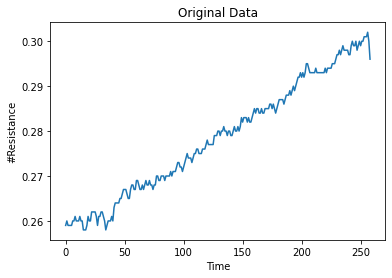

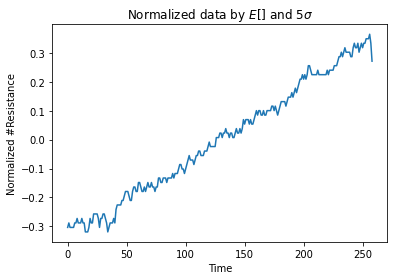

(246, 12, 1) (246,)
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 12, 1)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 10)                480       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [230]:
data = Dataset()
shape = data.X.shape[1:]
model = rnn_model(shape)

In [231]:
X_train, X_test, y_train, y_test = data.X_train, data.X_test, data.y_train, data.y_test
X, y = data.X, data.y
m = model

In [232]:
h = model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_data=(X_test, y_test))

Train on 196 samples, validate on 50 samples
Epoch 1/1000
196/196 [==============================] - 2s 10ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0669 - val_mse: 0.0669
Epoch 2/1000
196/196 [==============================] - 0s 221us/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 3/1000
196/196 [==============================] - 0s 215us/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 4/1000
196/196 [==============================] - 0s 215us/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0598 - val_mse: 0.0598
Epoch 5/1000
196/196 [==============================] - 0s 223us/step - loss: 0.0423 - mse: 0.0423 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 6/1000
196/196 [==============================] - 0s 222us/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0555 - val_mse: 0.0555
Epoch 7/1000
196/196 [==============================] - 0s 213us/step - loss: 0.0393 - mse: 0.0393 - val_loss: 0.0535 - val_mse: 0.0535
Epoc

196/196 [==============================] - 0s 208us/step - loss: 3.4781e-04 - mse: 3.4781e-04 - val_loss: 3.5176e-04 - val_mse: 3.5176e-04
Epoch 60/1000
196/196 [==============================] - 0s 211us/step - loss: 3.6085e-04 - mse: 3.6085e-04 - val_loss: 3.5902e-04 - val_mse: 3.5902e-04
Epoch 61/1000
196/196 [==============================] - 0s 214us/step - loss: 3.6948e-04 - mse: 3.6948e-04 - val_loss: 3.6333e-04 - val_mse: 3.6333e-04
Epoch 62/1000
196/196 [==============================] - 0s 208us/step - loss: 3.7501e-04 - mse: 3.7501e-04 - val_loss: 3.6465e-04 - val_mse: 3.6465e-04
Epoch 63/1000
196/196 [==============================] - 0s 203us/step - loss: 3.7617e-04 - mse: 3.7617e-04 - val_loss: 3.6201e-04 - val_mse: 3.6201e-04
Epoch 64/1000
196/196 [==============================] - 0s 200us/step - loss: 3.7406e-04 - mse: 3.7406e-04 - val_loss: 3.5537e-04 - val_mse: 3.5537e-04
Epoch 65/1000
196/196 [==============================] - 0s 216us/step - loss: 3.6866e-04 - mse:

196/196 [==============================] - 0s 205us/step - loss: 3.2501e-04 - mse: 3.2501e-04 - val_loss: 3.2379e-04 - val_mse: 3.2379e-04
Epoch 113/1000
196/196 [==============================] - 0s 199us/step - loss: 3.2494e-04 - mse: 3.2494e-04 - val_loss: 3.2444e-04 - val_mse: 3.2444e-04
Epoch 114/1000
196/196 [==============================] - 0s 202us/step - loss: 3.2525e-04 - mse: 3.2525e-04 - val_loss: 3.2508e-04 - val_mse: 3.2508e-04
Epoch 115/1000
196/196 [==============================] - 0s 205us/step - loss: 3.2507e-04 - mse: 3.2507e-04 - val_loss: 3.2344e-04 - val_mse: 3.2344e-04
Epoch 116/1000
196/196 [==============================] - 0s 202us/step - loss: 3.2476e-04 - mse: 3.2476e-04 - val_loss: 3.2279e-04 - val_mse: 3.2279e-04
Epoch 117/1000
196/196 [==============================] - 0s 199us/step - loss: 3.2513e-04 - mse: 3.2513e-04 - val_loss: 3.2204e-04 - val_mse: 3.2204e-04
Epoch 118/1000
196/196 [==============================] - 0s 199us/step - loss: 3.2464e-04 

196/196 [==============================] - 0s 204us/step - loss: 3.1992e-04 - mse: 3.1992e-04 - val_loss: 3.1783e-04 - val_mse: 3.1783e-04
Epoch 166/1000
196/196 [==============================] - 0s 212us/step - loss: 3.1984e-04 - mse: 3.1984e-04 - val_loss: 3.1776e-04 - val_mse: 3.1776e-04
Epoch 167/1000
196/196 [==============================] - 0s 201us/step - loss: 3.1997e-04 - mse: 3.1997e-04 - val_loss: 3.1834e-04 - val_mse: 3.1834e-04
Epoch 168/1000
196/196 [==============================] - 0s 202us/step - loss: 3.2186e-04 - mse: 3.2186e-04 - val_loss: 3.1519e-04 - val_mse: 3.1519e-04
Epoch 169/1000
196/196 [==============================] - 0s 192us/step - loss: 3.1954e-04 - mse: 3.1954e-04 - val_loss: 3.1530e-04 - val_mse: 3.1530e-04
Epoch 170/1000
196/196 [==============================] - 0s 205us/step - loss: 3.1941e-04 - mse: 3.1941e-04 - val_loss: 3.1654e-04 - val_mse: 3.1654e-04
Epoch 171/1000
196/196 [==============================] - 0s 203us/step - loss: 3.1959e-04 

196/196 [==============================] - 0s 210us/step - loss: 3.1462e-04 - mse: 3.1462e-04 - val_loss: 3.1047e-04 - val_mse: 3.1047e-04
Epoch 219/1000
196/196 [==============================] - 0s 259us/step - loss: 3.1425e-04 - mse: 3.1425e-04 - val_loss: 3.0955e-04 - val_mse: 3.0955e-04
Epoch 220/1000
196/196 [==============================] - 0s 334us/step - loss: 3.1446e-04 - mse: 3.1446e-04 - val_loss: 3.0732e-04 - val_mse: 3.0732e-04
Epoch 221/1000
196/196 [==============================] - 0s 228us/step - loss: 3.1442e-04 - mse: 3.1442e-04 - val_loss: 3.0817e-04 - val_mse: 3.0817e-04
Epoch 222/1000
196/196 [==============================] - 0s 234us/step - loss: 3.1468e-04 - mse: 3.1468e-04 - val_loss: 3.0762e-04 - val_mse: 3.0762e-04
Epoch 223/1000
196/196 [==============================] - 0s 249us/step - loss: 3.1407e-04 - mse: 3.1407e-04 - val_loss: 3.0988e-04 - val_mse: 3.0988e-04
Epoch 224/1000
196/196 [==============================] - 0s 231us/step - loss: 3.1401e-04 

196/196 [==============================] - 0s 211us/step - loss: 3.0878e-04 - mse: 3.0878e-04 - val_loss: 3.0447e-04 - val_mse: 3.0447e-04
Epoch 272/1000
196/196 [==============================] - 0s 208us/step - loss: 3.0861e-04 - mse: 3.0861e-04 - val_loss: 3.0477e-04 - val_mse: 3.0477e-04
Epoch 273/1000
196/196 [==============================] - 0s 204us/step - loss: 3.0848e-04 - mse: 3.0848e-04 - val_loss: 3.0223e-04 - val_mse: 3.0223e-04
Epoch 274/1000
196/196 [==============================] - 0s 208us/step - loss: 3.0811e-04 - mse: 3.0811e-04 - val_loss: 3.0056e-04 - val_mse: 3.0056e-04
Epoch 275/1000
196/196 [==============================] - 0s 212us/step - loss: 3.0802e-04 - mse: 3.0802e-04 - val_loss: 3.0048e-04 - val_mse: 3.0048e-04
Epoch 276/1000
196/196 [==============================] - 0s 228us/step - loss: 3.0792e-04 - mse: 3.0792e-04 - val_loss: 3.0105e-04 - val_mse: 3.0105e-04
Epoch 277/1000
196/196 [==============================] - 0s 217us/step - loss: 3.0785e-04 

196/196 [==============================] - 0s 213us/step - loss: 3.0353e-04 - mse: 3.0353e-04 - val_loss: 2.9309e-04 - val_mse: 2.9309e-04
Epoch 325/1000
196/196 [==============================] - 0s 209us/step - loss: 3.0248e-04 - mse: 3.0248e-04 - val_loss: 2.9493e-04 - val_mse: 2.9493e-04
Epoch 326/1000
196/196 [==============================] - 0s 214us/step - loss: 3.0227e-04 - mse: 3.0227e-04 - val_loss: 2.9792e-04 - val_mse: 2.9792e-04
Epoch 327/1000
196/196 [==============================] - 0s 203us/step - loss: 3.0245e-04 - mse: 3.0245e-04 - val_loss: 2.9708e-04 - val_mse: 2.9708e-04
Epoch 328/1000
196/196 [==============================] - 0s 220us/step - loss: 3.0261e-04 - mse: 3.0261e-04 - val_loss: 2.9652e-04 - val_mse: 2.9652e-04
Epoch 329/1000
196/196 [==============================] - 0s 213us/step - loss: 3.0197e-04 - mse: 3.0197e-04 - val_loss: 2.9373e-04 - val_mse: 2.9373e-04
Epoch 330/1000
196/196 [==============================] - 0s 208us/step - loss: 3.0312e-04 

196/196 [==============================] - 0s 203us/step - loss: 2.9672e-04 - mse: 2.9672e-04 - val_loss: 2.9070e-04 - val_mse: 2.9070e-04
Epoch 378/1000
196/196 [==============================] - 0s 211us/step - loss: 2.9770e-04 - mse: 2.9770e-04 - val_loss: 2.9169e-04 - val_mse: 2.9169e-04
Epoch 379/1000
196/196 [==============================] - 0s 204us/step - loss: 2.9983e-04 - mse: 2.9983e-04 - val_loss: 2.8554e-04 - val_mse: 2.8554e-04
Epoch 380/1000
196/196 [==============================] - 0s 205us/step - loss: 2.9679e-04 - mse: 2.9679e-04 - val_loss: 2.8604e-04 - val_mse: 2.8604e-04
Epoch 381/1000
196/196 [==============================] - 0s 203us/step - loss: 2.9632e-04 - mse: 2.9632e-04 - val_loss: 2.8835e-04 - val_mse: 2.8835e-04
Epoch 382/1000
196/196 [==============================] - 0s 206us/step - loss: 2.9612e-04 - mse: 2.9612e-04 - val_loss: 2.8992e-04 - val_mse: 2.8992e-04
Epoch 383/1000
196/196 [==============================] - 0s 208us/step - loss: 2.9684e-04 

196/196 [==============================] - 0s 210us/step - loss: 2.9216e-04 - mse: 2.9216e-04 - val_loss: 2.8352e-04 - val_mse: 2.8352e-04
Epoch 431/1000
196/196 [==============================] - 0s 210us/step - loss: 2.9190e-04 - mse: 2.9190e-04 - val_loss: 2.8074e-04 - val_mse: 2.8074e-04
Epoch 432/1000
196/196 [==============================] - 0s 204us/step - loss: 2.9062e-04 - mse: 2.9062e-04 - val_loss: 2.8221e-04 - val_mse: 2.8221e-04
Epoch 433/1000
196/196 [==============================] - 0s 207us/step - loss: 2.9073e-04 - mse: 2.9073e-04 - val_loss: 2.8173e-04 - val_mse: 2.8173e-04
Epoch 434/1000
196/196 [==============================] - 0s 210us/step - loss: 2.9118e-04 - mse: 2.9118e-04 - val_loss: 2.7947e-04 - val_mse: 2.7947e-04
Epoch 435/1000
196/196 [==============================] - 0s 201us/step - loss: 2.9092e-04 - mse: 2.9092e-04 - val_loss: 2.7985e-04 - val_mse: 2.7985e-04
Epoch 436/1000
196/196 [==============================] - 0s 202us/step - loss: 2.9031e-04 

196/196 [==============================] - 0s 211us/step - loss: 2.8521e-04 - mse: 2.8521e-04 - val_loss: 2.7622e-04 - val_mse: 2.7622e-04
Epoch 484/1000
196/196 [==============================] - 0s 225us/step - loss: 2.8504e-04 - mse: 2.8504e-04 - val_loss: 2.7886e-04 - val_mse: 2.7886e-04
Epoch 485/1000
196/196 [==============================] - 0s 214us/step - loss: 2.8528e-04 - mse: 2.8528e-04 - val_loss: 2.7671e-04 - val_mse: 2.7671e-04
Epoch 486/1000
196/196 [==============================] - 0s 204us/step - loss: 2.8494e-04 - mse: 2.8494e-04 - val_loss: 2.7515e-04 - val_mse: 2.7515e-04
Epoch 487/1000
196/196 [==============================] - 0s 208us/step - loss: 2.8796e-04 - mse: 2.8796e-04 - val_loss: 2.7056e-04 - val_mse: 2.7056e-04
Epoch 488/1000
196/196 [==============================] - 0s 223us/step - loss: 2.8712e-04 - mse: 2.8712e-04 - val_loss: 2.7548e-04 - val_mse: 2.7548e-04
Epoch 489/1000
196/196 [==============================] - 0s 215us/step - loss: 2.8568e-04 

196/196 [==============================] - 0s 213us/step - loss: 2.8022e-04 - mse: 2.8022e-04 - val_loss: 2.7317e-04 - val_mse: 2.7317e-04
Epoch 537/1000
196/196 [==============================] - 0s 211us/step - loss: 2.7988e-04 - mse: 2.7988e-04 - val_loss: 2.6878e-04 - val_mse: 2.6878e-04
Epoch 538/1000
196/196 [==============================] - 0s 216us/step - loss: 2.8163e-04 - mse: 2.8163e-04 - val_loss: 2.6450e-04 - val_mse: 2.6450e-04
Epoch 539/1000
196/196 [==============================] - 0s 205us/step - loss: 2.7990e-04 - mse: 2.7990e-04 - val_loss: 2.6689e-04 - val_mse: 2.6689e-04
Epoch 540/1000
196/196 [==============================] - 0s 209us/step - loss: 2.7971e-04 - mse: 2.7971e-04 - val_loss: 2.7242e-04 - val_mse: 2.7242e-04
Epoch 541/1000
196/196 [==============================] - 0s 210us/step - loss: 2.7959e-04 - mse: 2.7959e-04 - val_loss: 2.7223e-04 - val_mse: 2.7223e-04
Epoch 542/1000
196/196 [==============================] - 0s 205us/step - loss: 2.8107e-04 

196/196 [==============================] - 0s 228us/step - loss: 2.8080e-04 - mse: 2.8080e-04 - val_loss: 2.7191e-04 - val_mse: 2.7191e-04
Epoch 590/1000
196/196 [==============================] - 0s 204us/step - loss: 2.7498e-04 - mse: 2.7498e-04 - val_loss: 2.6193e-04 - val_mse: 2.6193e-04
Epoch 591/1000
196/196 [==============================] - 0s 211us/step - loss: 2.7403e-04 - mse: 2.7403e-04 - val_loss: 2.5725e-04 - val_mse: 2.5725e-04
Epoch 592/1000
196/196 [==============================] - 0s 204us/step - loss: 2.7970e-04 - mse: 2.7970e-04 - val_loss: 2.5695e-04 - val_mse: 2.5695e-04
Epoch 593/1000
196/196 [==============================] - 0s 221us/step - loss: 2.7563e-04 - mse: 2.7563e-04 - val_loss: 2.6799e-04 - val_mse: 2.6799e-04
Epoch 594/1000
196/196 [==============================] - 0s 209us/step - loss: 2.7590e-04 - mse: 2.7590e-04 - val_loss: 2.7558e-04 - val_mse: 2.7558e-04
Epoch 595/1000
196/196 [==============================] - 0s 216us/step - loss: 2.7636e-04 

196/196 [==============================] - 0s 209us/step - loss: 2.7006e-04 - mse: 2.7006e-04 - val_loss: 2.6549e-04 - val_mse: 2.6549e-04
Epoch 643/1000
196/196 [==============================] - 0s 212us/step - loss: 2.6994e-04 - mse: 2.6994e-04 - val_loss: 2.6026e-04 - val_mse: 2.6026e-04
Epoch 644/1000
196/196 [==============================] - 0s 201us/step - loss: 2.6924e-04 - mse: 2.6924e-04 - val_loss: 2.5440e-04 - val_mse: 2.5440e-04
Epoch 645/1000
196/196 [==============================] - 0s 214us/step - loss: 2.7024e-04 - mse: 2.7024e-04 - val_loss: 2.5479e-04 - val_mse: 2.5479e-04
Epoch 646/1000
196/196 [==============================] - 0s 202us/step - loss: 2.6990e-04 - mse: 2.6990e-04 - val_loss: 2.5816e-04 - val_mse: 2.5816e-04
Epoch 647/1000
196/196 [==============================] - 0s 210us/step - loss: 2.6803e-04 - mse: 2.6803e-04 - val_loss: 2.6527e-04 - val_mse: 2.6527e-04
Epoch 648/1000
196/196 [==============================] - 0s 207us/step - loss: 2.6969e-04 

196/196 [==============================] - 0s 217us/step - loss: 2.6487e-04 - mse: 2.6487e-04 - val_loss: 2.5213e-04 - val_mse: 2.5213e-04
Epoch 696/1000
196/196 [==============================] - 0s 227us/step - loss: 2.6375e-04 - mse: 2.6375e-04 - val_loss: 2.5721e-04 - val_mse: 2.5721e-04
Epoch 697/1000
196/196 [==============================] - 0s 212us/step - loss: 2.6476e-04 - mse: 2.6476e-04 - val_loss: 2.5564e-04 - val_mse: 2.5564e-04
Epoch 698/1000
196/196 [==============================] - 0s 209us/step - loss: 2.6438e-04 - mse: 2.6438e-04 - val_loss: 2.5560e-04 - val_mse: 2.5560e-04
Epoch 699/1000
196/196 [==============================] - 0s 228us/step - loss: 2.6360e-04 - mse: 2.6360e-04 - val_loss: 2.5150e-04 - val_mse: 2.5150e-04
Epoch 700/1000
196/196 [==============================] - 0s 211us/step - loss: 2.6419e-04 - mse: 2.6419e-04 - val_loss: 2.4866e-04 - val_mse: 2.4866e-04
Epoch 701/1000
196/196 [==============================] - 0s 227us/step - loss: 2.6417e-04 

196/196 [==============================] - 0s 210us/step - loss: 2.6037e-04 - mse: 2.6037e-04 - val_loss: 2.4803e-04 - val_mse: 2.4803e-04
Epoch 749/1000
196/196 [==============================] - 0s 211us/step - loss: 2.5908e-04 - mse: 2.5908e-04 - val_loss: 2.5455e-04 - val_mse: 2.5455e-04
Epoch 750/1000
196/196 [==============================] - 0s 206us/step - loss: 2.5979e-04 - mse: 2.5979e-04 - val_loss: 2.5617e-04 - val_mse: 2.5617e-04
Epoch 751/1000
196/196 [==============================] - 0s 199us/step - loss: 2.5969e-04 - mse: 2.5969e-04 - val_loss: 2.4855e-04 - val_mse: 2.4855e-04
Epoch 752/1000
196/196 [==============================] - 0s 206us/step - loss: 2.6008e-04 - mse: 2.6008e-04 - val_loss: 2.4372e-04 - val_mse: 2.4372e-04
Epoch 753/1000
196/196 [==============================] - 0s 212us/step - loss: 2.6001e-04 - mse: 2.6001e-04 - val_loss: 2.4852e-04 - val_mse: 2.4852e-04
Epoch 754/1000
196/196 [==============================] - 0s 205us/step - loss: 2.5988e-04 

196/196 [==============================] - 0s 205us/step - loss: 2.5541e-04 - mse: 2.5541e-04 - val_loss: 2.4978e-04 - val_mse: 2.4978e-04
Epoch 802/1000
196/196 [==============================] - 0s 203us/step - loss: 2.5452e-04 - mse: 2.5452e-04 - val_loss: 2.4365e-04 - val_mse: 2.4365e-04
Epoch 803/1000
196/196 [==============================] - 0s 208us/step - loss: 2.5425e-04 - mse: 2.5425e-04 - val_loss: 2.4137e-04 - val_mse: 2.4137e-04
Epoch 804/1000
196/196 [==============================] - 0s 209us/step - loss: 2.5446e-04 - mse: 2.5446e-04 - val_loss: 2.4291e-04 - val_mse: 2.4291e-04
Epoch 805/1000
196/196 [==============================] - 0s 210us/step - loss: 2.5399e-04 - mse: 2.5399e-04 - val_loss: 2.4561e-04 - val_mse: 2.4561e-04
Epoch 806/1000
196/196 [==============================] - 0s 211us/step - loss: 2.5398e-04 - mse: 2.5398e-04 - val_loss: 2.4542e-04 - val_mse: 2.4542e-04
Epoch 807/1000
196/196 [==============================] - 0s 214us/step - loss: 2.5397e-04 

196/196 [==============================] - 0s 218us/step - loss: 2.5018e-04 - mse: 2.5018e-04 - val_loss: 2.3596e-04 - val_mse: 2.3596e-04
Epoch 855/1000
196/196 [==============================] - 0s 208us/step - loss: 2.5106e-04 - mse: 2.5106e-04 - val_loss: 2.3799e-04 - val_mse: 2.3799e-04
Epoch 856/1000
196/196 [==============================] - 0s 200us/step - loss: 2.5290e-04 - mse: 2.5290e-04 - val_loss: 2.4581e-04 - val_mse: 2.4581e-04
Epoch 857/1000
196/196 [==============================] - 0s 197us/step - loss: 2.5146e-04 - mse: 2.5146e-04 - val_loss: 2.4318e-04 - val_mse: 2.4318e-04
Epoch 858/1000
196/196 [==============================] - 0s 207us/step - loss: 2.5114e-04 - mse: 2.5114e-04 - val_loss: 2.3506e-04 - val_mse: 2.3506e-04
Epoch 859/1000
196/196 [==============================] - 0s 198us/step - loss: 2.5237e-04 - mse: 2.5237e-04 - val_loss: 2.3705e-04 - val_mse: 2.3705e-04
Epoch 860/1000
196/196 [==============================] - 0s 215us/step - loss: 2.4902e-04 

196/196 [==============================] - 0s 213us/step - loss: 2.4850e-04 - mse: 2.4850e-04 - val_loss: 2.4490e-04 - val_mse: 2.4490e-04
Epoch 908/1000
196/196 [==============================] - 0s 209us/step - loss: 2.4584e-04 - mse: 2.4584e-04 - val_loss: 2.3362e-04 - val_mse: 2.3362e-04
Epoch 909/1000
196/196 [==============================] - 0s 210us/step - loss: 2.4721e-04 - mse: 2.4721e-04 - val_loss: 2.3063e-04 - val_mse: 2.3063e-04
Epoch 910/1000
196/196 [==============================] - 0s 209us/step - loss: 2.4756e-04 - mse: 2.4756e-04 - val_loss: 2.3587e-04 - val_mse: 2.3587e-04
Epoch 911/1000
196/196 [==============================] - 0s 227us/step - loss: 2.4593e-04 - mse: 2.4593e-04 - val_loss: 2.4986e-04 - val_mse: 2.4986e-04
Epoch 912/1000
196/196 [==============================] - 0s 206us/step - loss: 2.4771e-04 - mse: 2.4771e-04 - val_loss: 2.4253e-04 - val_mse: 2.4253e-04
Epoch 913/1000
196/196 [==============================] - 0s 213us/step - loss: 2.4471e-04 

196/196 [==============================] - 0s 212us/step - loss: 2.4295e-04 - mse: 2.4295e-04 - val_loss: 2.4947e-04 - val_mse: 2.4947e-04
Epoch 961/1000
196/196 [==============================] - 0s 213us/step - loss: 2.4576e-04 - mse: 2.4576e-04 - val_loss: 2.4173e-04 - val_mse: 2.4173e-04
Epoch 962/1000
196/196 [==============================] - 0s 213us/step - loss: 2.4314e-04 - mse: 2.4314e-04 - val_loss: 2.2773e-04 - val_mse: 2.2773e-04
Epoch 963/1000
196/196 [==============================] - 0s 236us/step - loss: 2.4506e-04 - mse: 2.4506e-04 - val_loss: 2.2897e-04 - val_mse: 2.2897e-04
Epoch 964/1000
196/196 [==============================] - 0s 226us/step - loss: 2.4204e-04 - mse: 2.4204e-04 - val_loss: 2.4258e-04 - val_mse: 2.4258e-04
Epoch 965/1000
196/196 [==============================] - 0s 242us/step - loss: 2.4254e-04 - mse: 2.4254e-04 - val_loss: 2.4290e-04 - val_mse: 2.4290e-04
Epoch 966/1000
196/196 [==============================] - 0s 240us/step - loss: 2.4247e-04 

In [233]:
print(h.history.keys())

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


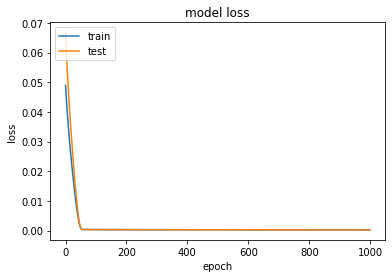

In [234]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

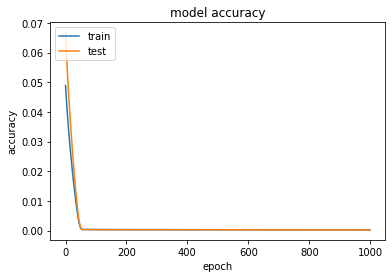

In [235]:
# summarize history for accuracy
plt.plot(h.history['mse'])
plt.plot(h.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

50/50 [==============================] - 0s 196us/step
Loss: [0.00022655264125205578, 0.00022655264183413237]


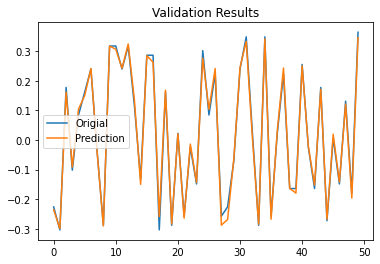

In [236]:
yp = m.predict(X_test)
print('Loss:', m.evaluate(X_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

In [237]:
yp = m.predict(X_test).reshape(-1)
print('Loss:', m.evaluate(X_test, y_test))  
print(yp.shape, y_test.shape)

50/50 [==============================] - 0s 218us/step
Loss: [0.00022655264125205578, 0.00022655264183413237]
(50,) (50,)


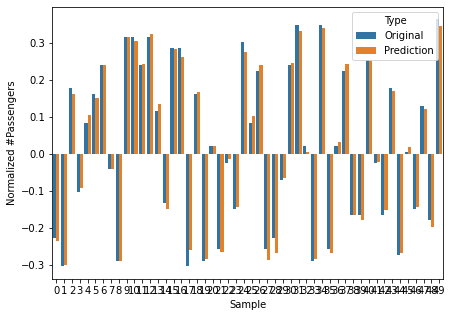

In [238]:
df = pd.DataFrame()
df['Sample'] = list(range(len(y_test))) * 2
df['Normalized #Passengers'] = np.concatenate([y_test, yp], axis=0)
df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(yp)

plt.figure(figsize=(7, 5))
sns.barplot(x="Sample", y="Normalized #Passengers", hue="Type", data=df)
plt.ylabel('Normalized #Passengers')
plt.show()

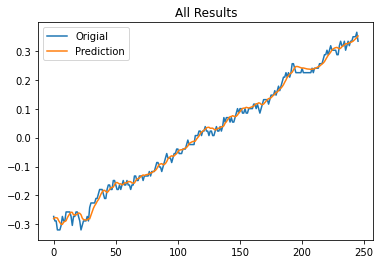

In [239]:
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

In [240]:
model.save('rnn_cell1_model.h5')

In [241]:
dftest = pd.DataFrame(y)
dftest.head()

,0
0,-0.272684
1,-0.288226
2,-0.288226
3,-0.319311
4,-0.319311


In [242]:
dftest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,246.0,0.01321,0.193879,-0.319311,-0.148344,0.022624,0.189706,0.364559


In [243]:
dfytest = pd.DataFrame(yp)
dfytest.head()

,0
0,-0.280661
1,-0.276535
2,-0.277535
3,-0.278167
4,-0.286986


In [244]:
dfytest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,246.0,0.014042,0.193148,-0.300175,-0.155777,0.027199,0.175248,0.351676


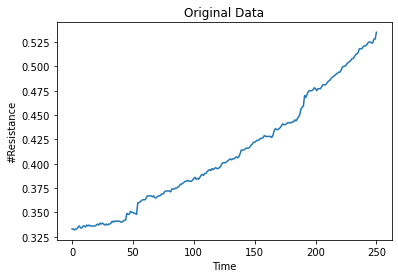

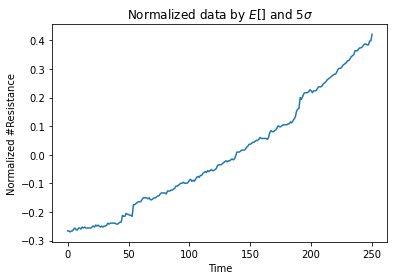

(238, 12, 1) (238,)
48/48 [==============================] - 0s 174us/step
Loss: [5.543366811859111e-05, 5.543366933125071e-05]


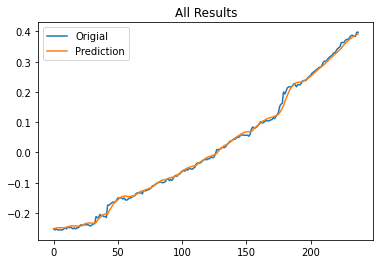

In [245]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_23.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

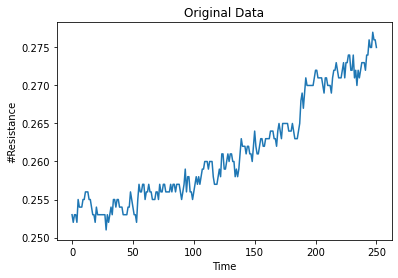

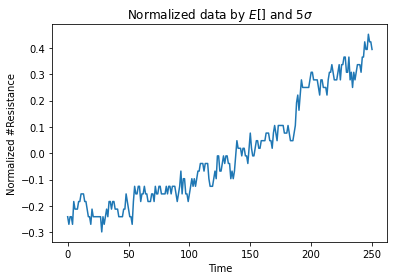

(238, 12, 1) (238,)
48/48 [==============================] - 0s 182us/step
Loss: [0.0015209784420828025, 0.0015209784032776952]


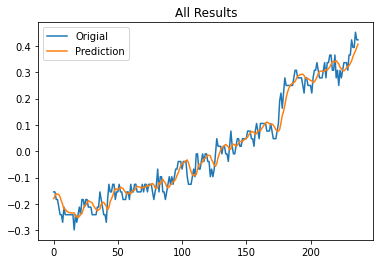

In [246]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_22.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

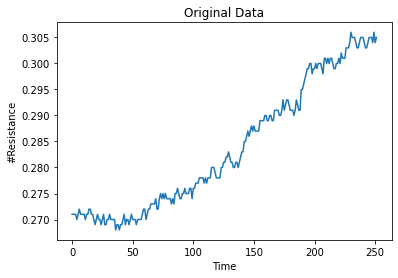

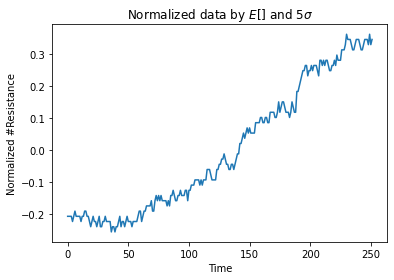

(239, 12, 1) (239,)
48/48 [==============================] - 0s 188us/step
Loss: [0.0003600420895963907, 0.0003600420895963907]


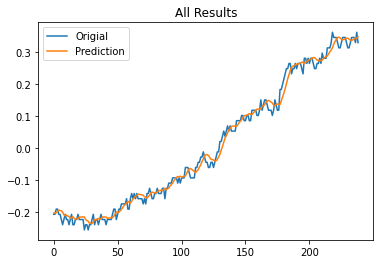

In [247]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_20.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

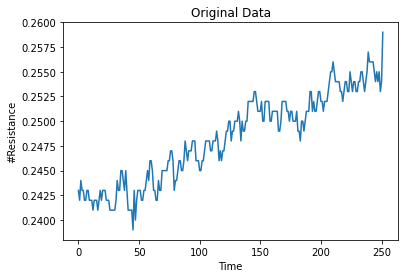

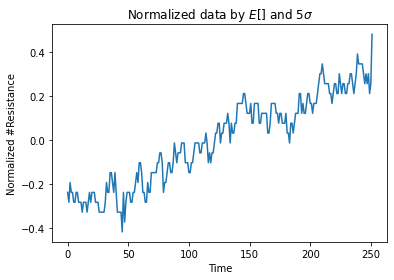

(239, 12, 1) (239,)
48/48 [==============================] - 0s 201us/step
Loss: [0.0022388885651404658, 0.0022388885263353586]


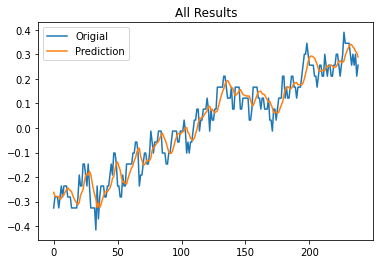

In [248]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_19.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

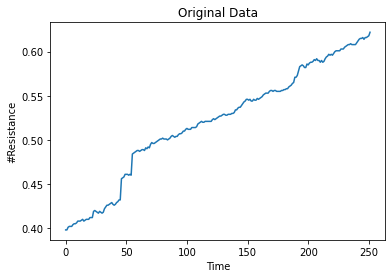

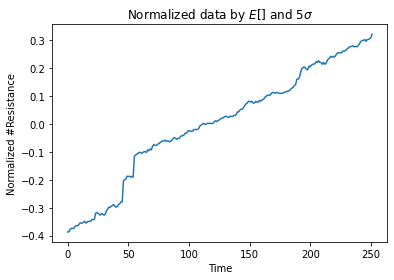

(239, 12, 1) (239,)
48/48 [==============================] - 0s 167us/step
Loss: [0.00010197417577728629, 0.00010197417577728629]


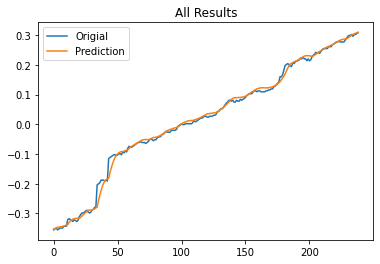

In [249]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_18.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

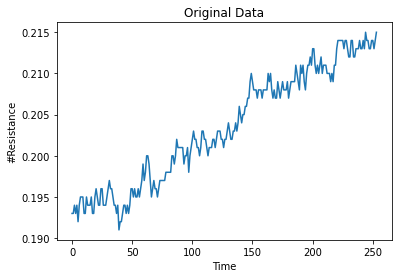

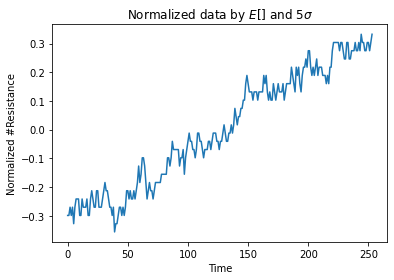

(241, 12, 1) (241,)
49/49 [==============================] - 0s 180us/step
Loss: [0.0012791392640495787, 0.0012791391927748919]


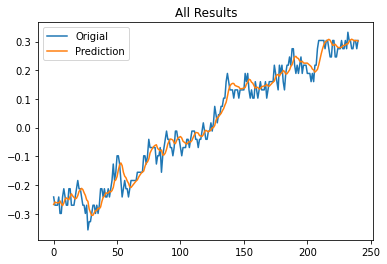

In [250]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_9.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

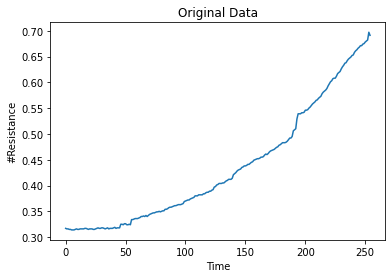

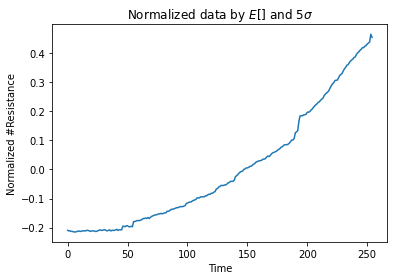

(242, 12, 1) (242,)
49/49 [==============================] - 0s 177us/step
Loss: [4.7152376134122e-05, 4.7152378101600334e-05]


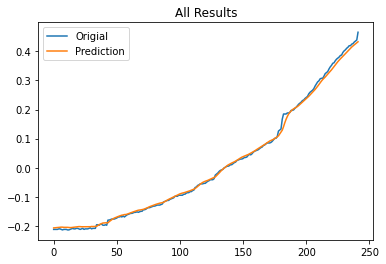

In [251]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_7.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

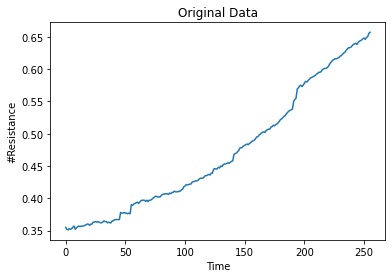

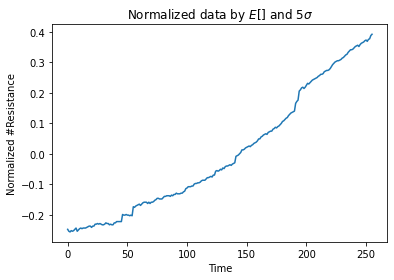

(243, 12, 1) (243,)
49/49 [==============================] - 0s 189us/step
Loss: [3.702095815168256e-05, 3.70209600077942e-05]


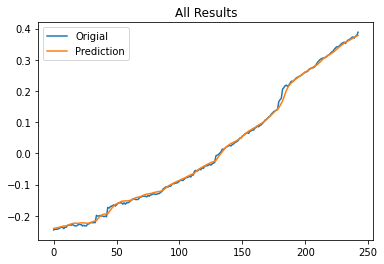

In [252]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_06.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

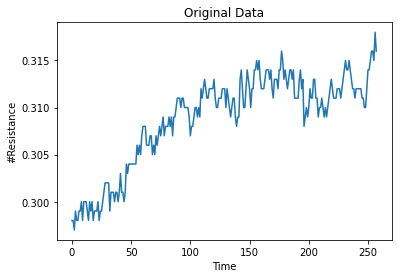

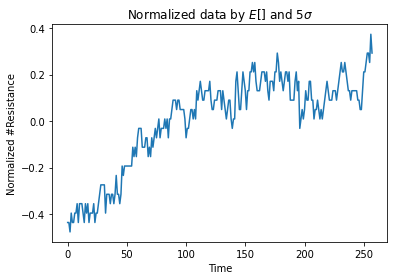

(245, 12, 1) (245,)
49/49 [==============================] - 0s 200us/step
Loss: [0.0028659391920177303, 0.0028659391682595015]


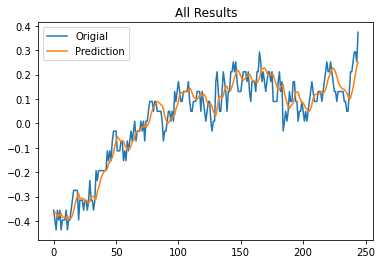

In [253]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_03.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()